In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !impoprtant; }</style>"))
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**What is Dystopia?**


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

The following columns:

* GDP per Capita
* Family
* Life Expectancy
* Freedom 
* Generosity
* Trust (Government Corruption)

describe the extent to which these factors contribute in evaluating the happiness in each country.

* **Dystopia Residual** metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

**What are the residuals?**

**The residuals**, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**No null values present in the dataset. Good to go.**

**Checking the datatypes of the columns**

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

**In the above dataset, the target is to predict the Happiness Score. We can observe that 'Happiness Score' has continuous data and float as data type.This dataset can be viewed as Regression task.**

**Making DataFrame for Nominal data**

In [8]:
df_nominal = df[['Country','Region']]

In [9]:
df_nominal.columns

Index(['Country', 'Region'], dtype='object')

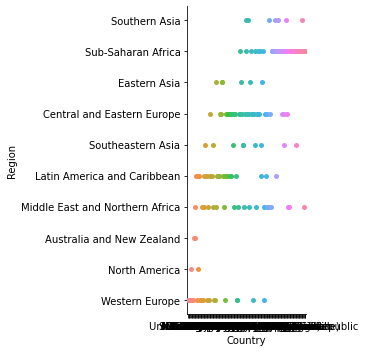

In [10]:
ax = sns.catplot(x='Country',y='Region',data = df_nominal,kind='swarm')

**Making DataFrame for continuous data**

In [11]:
df_cont = df[['Happiness Score','Standard Error','Economy (GDP per Capita)','Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

In [12]:
df_cont.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**Observations:**

1. Happiness Score: 

* Count - 158 means no null values present
* Min value - 2.839000
* Max value - 7.587000
* Mean value - 5.375734

2. Standard Error:

* Count - 158 means no null values present
* Min value - 0.018480
* Max value - 0.136930
* Mean value - 0.047885

3. Economy (GDP per Capita):

* Count - 158 means no null values present
* Min value - 0.00000
* Max value - 1.690420
* Mean value - 0.846137

4. Family:

* Count - 158 means no null values present
* Min value - 0.00000
* Max value - 1.402230
* Mean value - 0.991046

5. Health (Life Expectancy):

* Count - 158 means no null values present
* Min value - 0.00000
* Max value - 1.025250
* Mean value - 0.630259

6. Freedom:

* Count - 158 means no null values present
* Min value - 0.00000
* Max value - 0.669730
* Mean value - 0.428615

7. Trust (Government Corruption):

* Count - 158 means no null values present
* Min value - 0.00000
* Max value - 0.551910
* Mean value - 0.143422

8. Generosity:

* Count - 158 means no null values present
* Min value - 0.00000
* Max value - 0.795880
* Mean value - 0.237296

9. Dystopia Residual:

* Count - 158 means no null values present
* Min value - 0.328580
* Max value - 3.602140
* Mean value - 2.098977

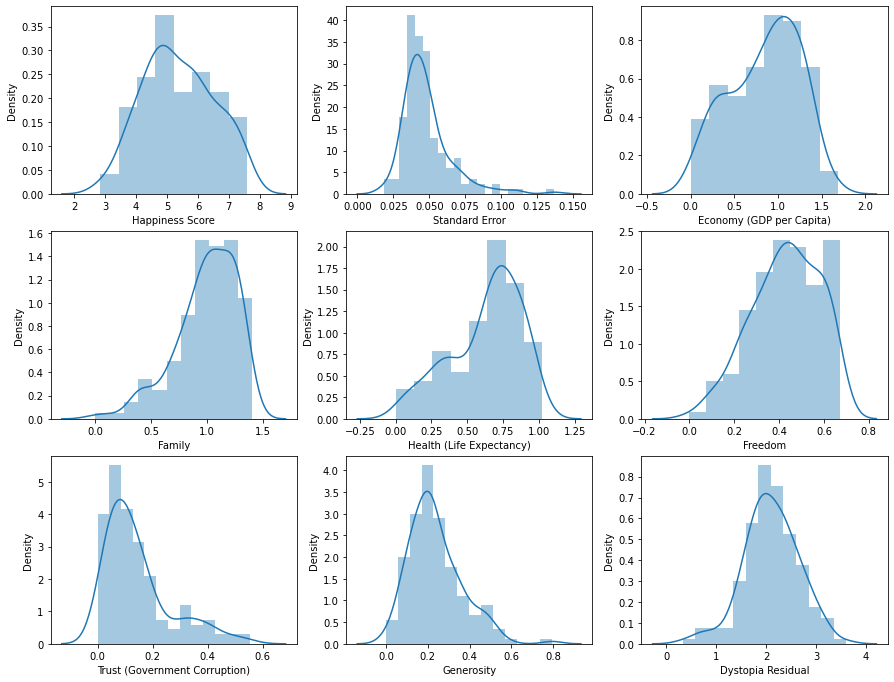

In [13]:
# Distribution plot
plt.figure(figsize = (15,20))
plotnumber=1

for column in df_cont:
    if plotnumber<=12:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_cont[column])
        plt.xlabel(column,fontsize =10)
    plotnumber+=1
plt.show()

**We can observe from the distribution plot of the features that:**

a) Data distribution of **'Happiness score'** is normally distributed.

b) **'Standard Error'** data is positively skewed.

c) **'Economy(GDP per capia)'** data looks normally distributed.

d) **'Family'** data is negatively skewed.

e) **'Health (Life Expectancy)'** data is negatively skewed.

f) **'Freedom'** data looks normally distributed.

g) **'Trust(Government corruption)'** is positively skewed.

h) **'Generosity'** data is positively skewed.

i) **'Dystopia Residual'** is normally distributed.

Lets check the skewnes present in the data

In [14]:
df_cont.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

**Keeping +/-0.5 as the range of skewness, here are the columns which does not lie within this range.**

* Standard Error

* Family

* Health (Life Expectancy)

* Trust (Government Corruption)

* Generosity

# Correlation of the columns with the target column (Heatmap)

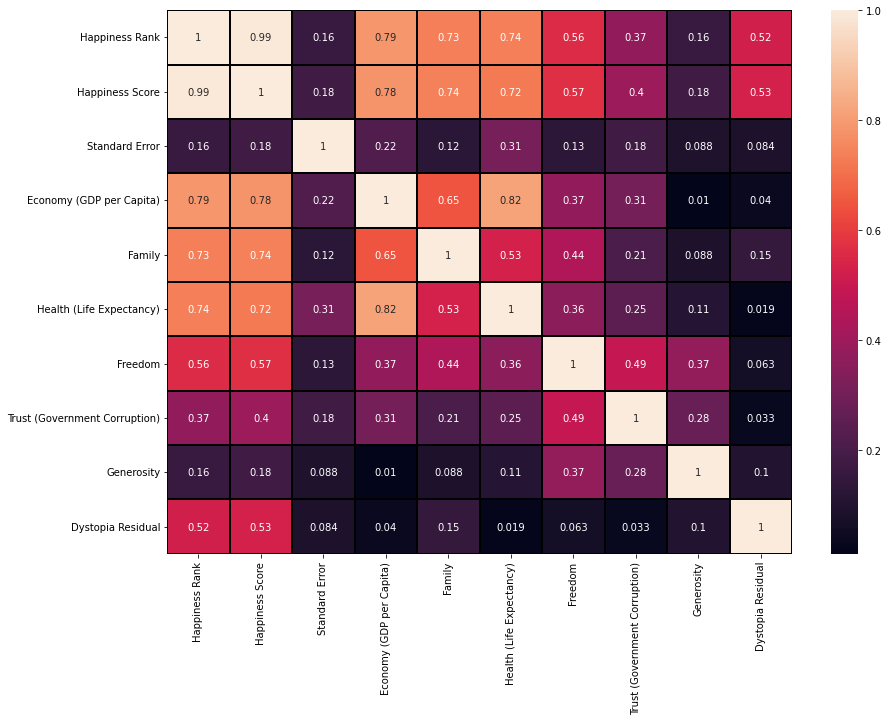

In [17]:
df_corr = df.corr().abs()

plt.figure(figsize = (14,10))

sns.heatmap(df_corr,annot = True,annot_kws = {'size':10},linecolor='black',linewidth=0.2)

plt.show()

* **Happiness Rank** is strongly correlated with **Happiness Score**. So we can **drop** the column of **Happiness Rank**.


* **Health(Life Expectancy)** is positively correlated with **Economy(GDP per capita)**. Need to check the multi collinearity    between them.

# Skewness treatment using PowerTransformer

In [20]:
from sklearn.preprocessing import PowerTransformer

In [21]:
pt = PowerTransformer()

**Seperating features and target variable and also dropping Happiness Rank from the feature due to strong correlation with
the target and dropping categorical columns 'Country' and 'Region' as they are nominal**

In [18]:

X = df.drop(['Happiness Score','Country', 'Region', 'Happiness Rank'],axis=1)
y= df['Happiness Score']

In [22]:
X_new_pt = pt.fit_transform(X)

In [23]:
# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

In [24]:
# Checking Skewness
X.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
dtype: float64

**Skewness reduced in the features data and varies in the range from (-0.18 to 0.18)**

In [25]:
df_new = X

In [26]:
df_new['Happiness Score'] = y

In [27]:
df_new

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992,7.587
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011,7.561
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275,7.527
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035,7.522
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118,7.427
...,...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259,3.465
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565,3.340
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216,3.006
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801,2.905


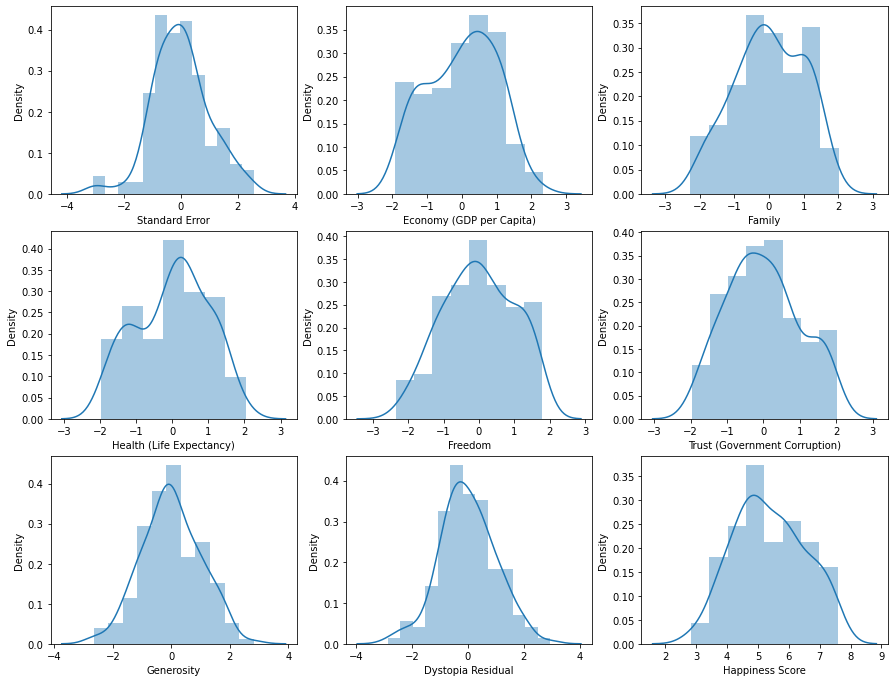

In [28]:
# Checking skewness using Distribution plot
plt.figure(figsize = (15,20))
plotnumber=1

for column in df_new:
    if plotnumber<=9:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize =10)
    plotnumber+=1
plt.show()

**Adding the categorical columns to the new dataframe**

In [29]:
df_new['Country'] = df['Country']

In [31]:
df_new['Region'] = df['Region']

In [32]:
df_new

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score,Country,Region
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992,7.587,Switzerland,Western Europe
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011,7.561,Iceland,Western Europe
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275,7.527,Denmark,Western Europe
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035,7.522,Norway,Western Europe
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118,7.427,Canada,North America
...,...,...,...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259,3.465,Rwanda,Sub-Saharan Africa
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565,3.340,Benin,Sub-Saharan Africa
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216,3.006,Syria,Middle East and Northern Africa
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801,2.905,Burundi,Sub-Saharan Africa


# Outliers Check

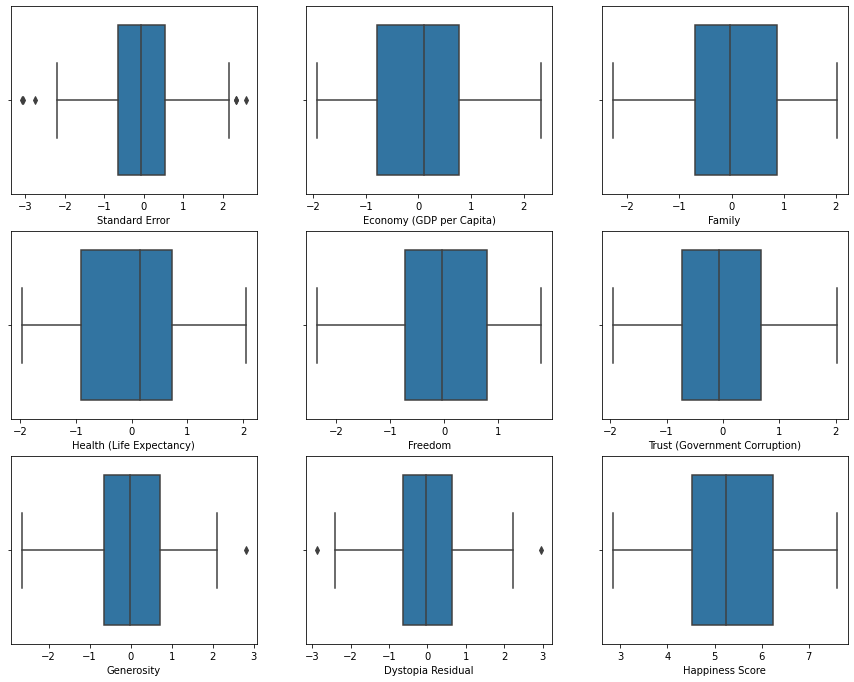

In [33]:
plt.figure(figsize = (15,20))
plotnumber=1

for column in df_new:
    if plotnumber<=9:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize =10)
    plotnumber+=1
plt.show()

**We will keep the outliers as data is too low to remove the outliers as some important information may be lost**

# Encoding of categorical columns

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
oen = OrdinalEncoder()

In [38]:
for i in df_new.columns:
    if df_new[i].dtypes == "object":
        df_new[i] = oen.fit_transform(df_new[i].values.reshape(-1,1))

In [39]:
df_new

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score,Country,Region
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992,7.587,135.0,9.0
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011,7.561,58.0,9.0
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275,7.527,37.0,9.0
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035,7.522,105.0,9.0
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118,7.427,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259,3.465,118.0,8.0
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565,3.340,13.0,8.0
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216,3.006,136.0,4.0
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801,2.905,21.0,8.0


# Scaling the data using StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_new = df_new.drop('Happiness Score',axis=1)
y_new = df_new['Happiness Score']

In [41]:
X_scaled = scaler.fit_transform(X_new)

In [42]:
X_scaled

array([[-0.9722262 ,  1.44606101,  1.66920633, ...,  0.75099154,
         1.23877001,  1.30025593],
       [ 0.30934969,  1.17332111,  2.01213244, ...,  1.11001108,
        -0.44946522,  1.30025593],
       [-1.06201662,  1.23983557,  1.73958573, ...,  0.70227525,
        -0.90989302,  1.30025593],
       ...,
       [ 0.39913742, -0.5134688 , -1.69066357, ..., -2.86621557,
         1.26069514, -0.37544095],
       [ 1.92690194, -1.89495386, -1.79680304, ..., -0.51480136,
        -1.26069514,  0.96511655],
       [ 1.31032295, -1.52122584, -2.16039658, ..., -0.97664547,
         1.37032081,  0.96511655]])

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

# Finding the best random state

In [44]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_new,test_size=0.2,random_state=i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the test accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n") 

At random state 0,the training accuracy is :- 0.9931458316254903
At random state 0,the test accuracy is :- 0.9927570992881888


At random state 1,the training accuracy is :- 0.9931147971410241
At random state 1,the test accuracy is :- 0.9925682762225564


At random state 2,the training accuracy is :- 0.99236789960157
At random state 2,the test accuracy is :- 0.995261918357221


At random state 3,the training accuracy is :- 0.9925094672314959
At random state 3,the test accuracy is :- 0.9951896726653187


At random state 4,the training accuracy is :- 0.9919071542198971
At random state 4,the test accuracy is :- 0.9959449122080668


At random state 5,the training accuracy is :- 0.9932902376695931
At random state 5,the test accuracy is :- 0.9904024884616058


At random state 6,the training accuracy is :- 0.9928988385071201
At random state 6,the test accuracy is :- 0.9933369597336937


At random state 7,the training accuracy is :- 0.9937790065116533
At random state 7,the test accuracy is :- 

**Taking the random state where difference between training and testing accuracy is minimum. Taking random state =98**

# Model initiation and training - Linear Regression

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_new,test_size=0.2,random_state=98)
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
pred_test = lr.predict(X_test)

In [47]:
print(r2_score(y_test,pred_test))

0.9928637506632335


# Cross-validation of the model

In [48]:
Training_accuracy = r2_score(y_train,pred_train)
Testing_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,X_scaled,y_new,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j}, the cv score is {cv_mean} and accuracy score for training is {Training_accuracy} and accuracy for testing is {Testing_accuracy}")
    print("/n")

At cross fold 2, the cv score is 0.847953479807541 and accuracy score for training is -0.833256932349518 and accuracy for testing is 0.9928637506632335
/n
At cross fold 3, the cv score is 0.8823066782340477 and accuracy score for training is -0.833256932349518 and accuracy for testing is 0.9928637506632335
/n
At cross fold 4, the cv score is 0.8376027368371732 and accuracy score for training is -0.833256932349518 and accuracy for testing is 0.9928637506632335
/n
At cross fold 5, the cv score is 0.7999097859448113 and accuracy score for training is -0.833256932349518 and accuracy for testing is 0.9928637506632335
/n
At cross fold 6, the cv score is 0.7059215263065437 and accuracy score for training is -0.833256932349518 and accuracy for testing is 0.9928637506632335
/n
At cross fold 7, the cv score is 0.6006666237357636 and accuracy score for training is -0.833256932349518 and accuracy for testing is 0.9928637506632335
/n
At cross fold 8, the cv score is 0.5719682665708021 and accuracy 

**Since cv_score is maximum for sv=3, So we will take cv=3**

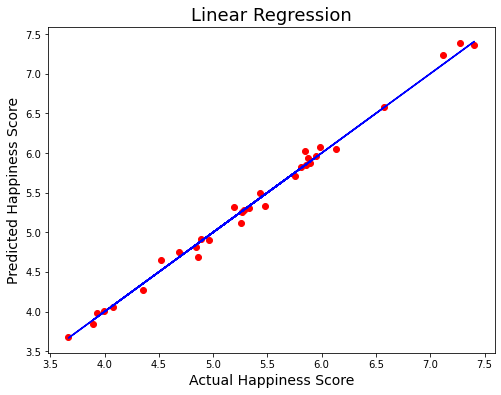

In [49]:
# Checking Grphically(Actual vs Predicted)
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color ='r')
plt.plot(y_test,y_test,color ='b')
plt.xlabel('Actual Happiness Score',fontsize = 14)
plt.ylabel('Predicted Happiness Score',fontsize =14)
plt.title('Linear Regression',fontsize = 18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ls = Lasso()

In [51]:
parameters = {'alpha':[0.001,0.01,0.1,1,10],
             'random_state':list(range(0,10))}
grid_ls = GridSearchCV(ls,parameters)
grid_ls.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [52]:
grid_ls.best_params_

{'alpha': 0.001, 'random_state': 0}

In [53]:
ls = Lasso(alpha = 0.001,random_state = 0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls =ls.predict(X_test)
ls_score_training*100

99.3099153069784

In [54]:
ls_score_test = ls.score(X_test,y_test)

In [55]:
ls_score_test*100

99.31604044526689

In [56]:
cv_score = cross_val_score(ls,X_scaled,y_new,cv=3)
cv_mean = cv_score.mean()
cv_mean*100

88.36813029051355

# Ensemble technique

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor()

In [59]:
parameters = {'criterion':['mse','mae'],
             'min_samples_split':range(4,9),
             'max_features':['auto','sqrt','log2'],
             'max_samples':(0.1,0.2,0.25)}

In [60]:
grid_rf = GridSearchCV(rf,parameters)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)

{'criterion': 'mse', 'max_features': 'log2', 'max_samples': 0.25, 'min_samples_split': 4}


In [62]:
rf = RandomForestRegressor(criterion='mse' ,min_samples_split=4 ,max_features='log2' ,max_samples=0.25 )
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision = rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print("R2 score:",rfs*100)

rf_score = cross_val_score(rf,X_scaled,y_new,cv=5)
rfc = rf_score.mean()
print("Cross val score:",rfc*100)

R2 score: 79.81718875293294
Cross val score: -626.9162567046036
